lukeb.co/sql_invoices_db

1. I want to see what happens to the rates if we increase the price.

* Increase hourly rates by 5

* Why? See how budget would be affeted if raise is given

In [ ]:
SELECT
	project_company,
    nerd_id,						-- ботанік
    nerd_role,
    hours_rate AS rate_original,	-- погодинна ставка
    hours_rate - 5 AS rate_drop,	-- падіння ставки
    hours_rate + 5 AS rate_hike	    -- підвищення ставки
FROM
	invoices_fact
   ;

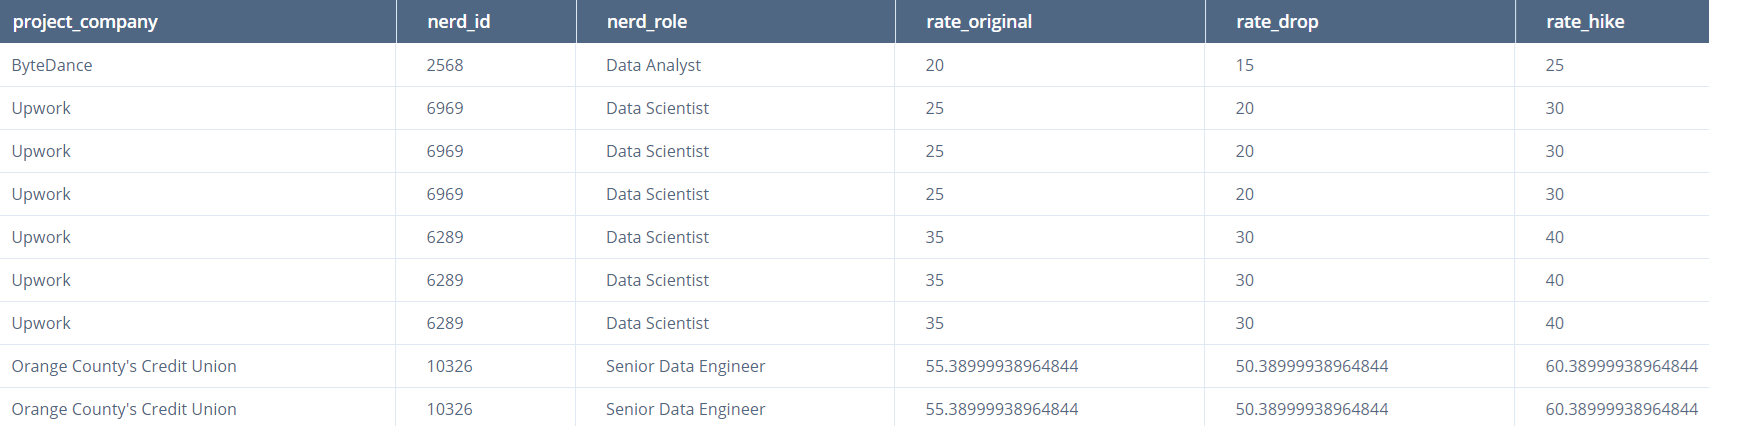

2. The total amount is more than $1000 after the rate increase

In [ ]:
SELECT
	project_company,
    nerd_id,						-- ботанік
    nerd_role,
    hours_spent,
    hours_rate AS rate_original, 		-- погодинна ставка
    hours_rate + 5 AS rate_hike,	    -- підвищення ставки
    (hours_rate + 5) * hours_spent AS project_total
FROM
	invoices_fact
WHERE project_total > 1000
;

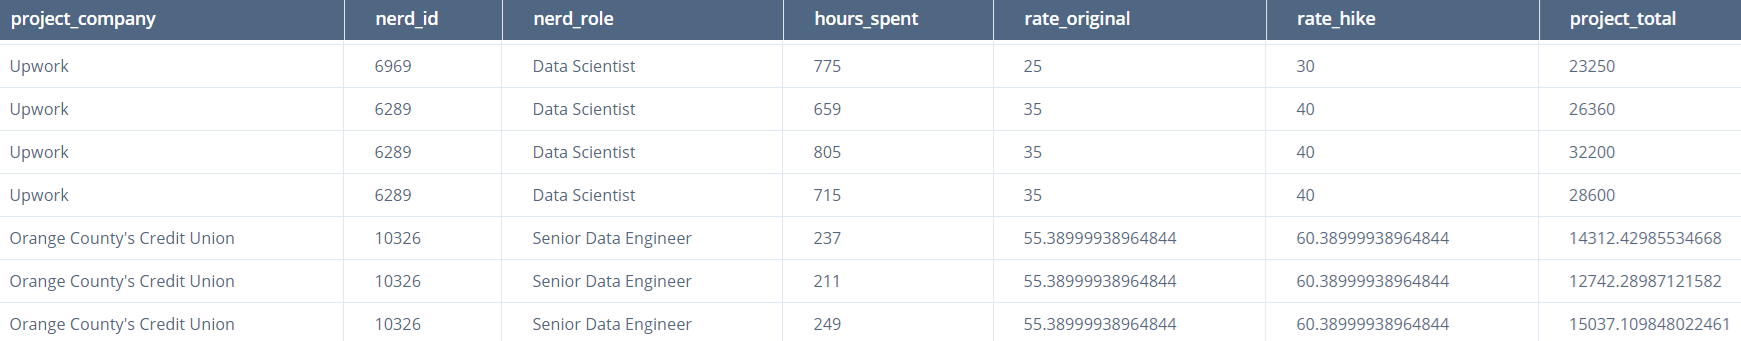

3. If an employee worked 10 hours, using 10 % 8 would give 2, indicating the employee worked 2 hours beyond the standard 8-hour workday

In [ ]:
SELECT
	activity_id,
    hours_spent,
    hours_spent % 8 AS extra_hours	-- перепрацьовані години
FROM
	invoices_fact
WHERE (hours_spent BETWEEN 8 AND 16) AND
	  extra_hours > 0
ORDER BY hours_spent
;

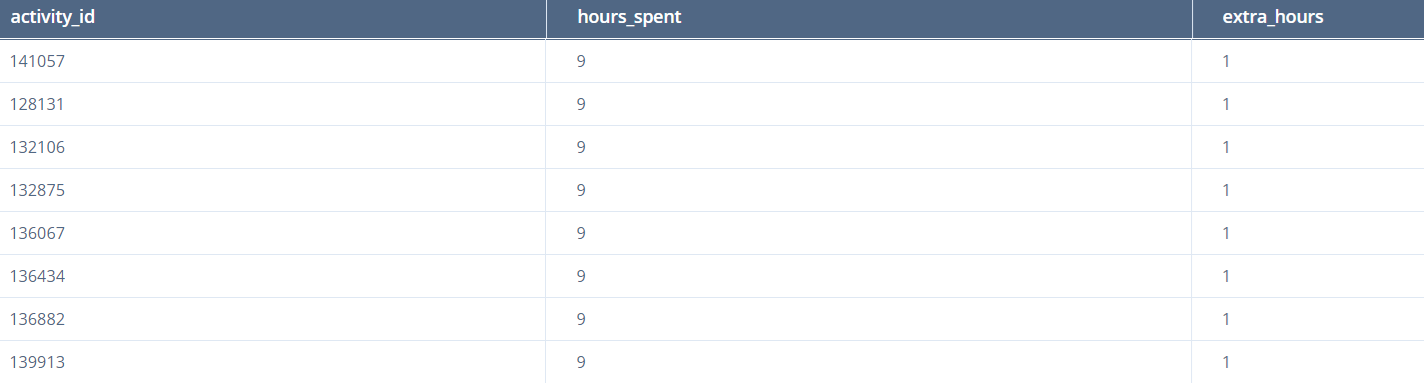

4.

lukeb.co/sql_jobs_db

1. Get job details for BOTH 'Data Analyst' or 'Business Analyst' positions
* For 'Data Analyst', I want jobs only > $100k

* For 'Business Analyst', I only want jobs > $70k

Only include jobs located in EITHER:
* 'Boston, MA'
* 'Anywhere' (i.e., Remote jobs)

In [ ]:
SELECT
	job_title_short,
    job_location,
    job_via,
    salary_year_avg
FROM job_postings_fact
WHERE job_location IN ('Boston, MA', 'Anywhere') AND
	(																                                	--перша умова
	(job_title_short = 'Data Analyst' AND salary_year_avg > 100000)	OR
    (job_title_short = 'Business Analyst' AND salary_year_avg > 70000)
     )
;

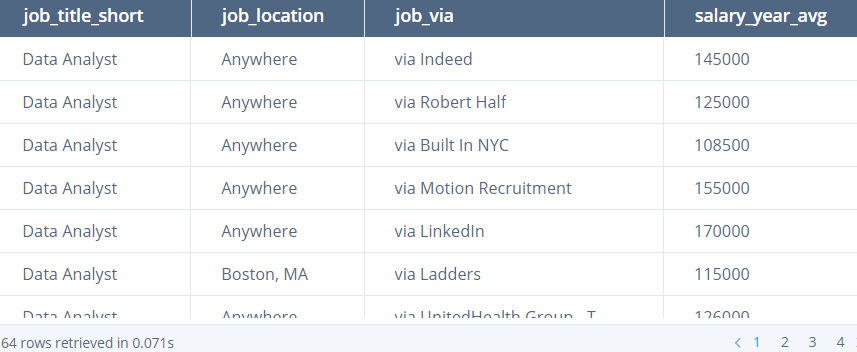

2. job_title = Business Analyst

In [ ]:
SELECT
	job_id,
    job_title,
    job_title_short,
    job_location
FROM job_postings_fact
WHERE job_title LIKE '%Business_Analyst%'
;

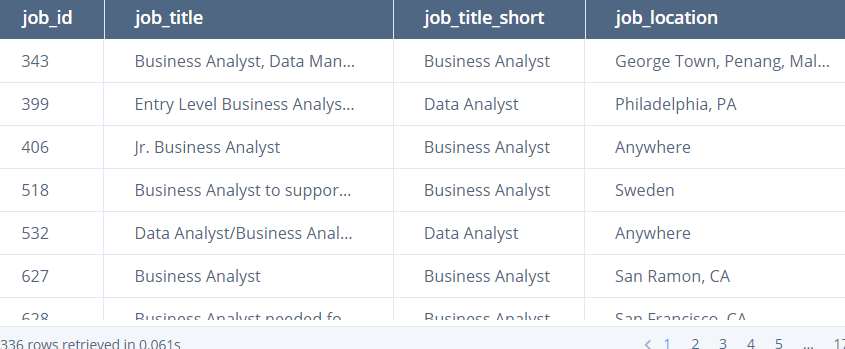

3. In the company_dim table find all company names that include 'Tech' immediatly followed by any single character. Return the name column.

In [ ]:
SELECT
	name
FROM company_dim
WHERE name LIKE 'Tech%'
;

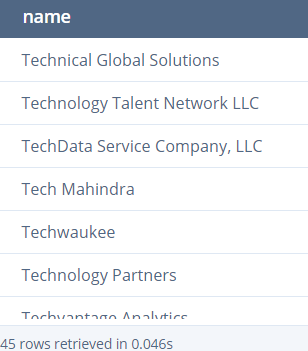

4. Look for non-senior data analyst or business analyst roles

Get the job title, location, and average yearly salary

In [ ]:
SELECT
	job_title,
    job_location AS location,
    salary_year_avg AS salary
FROM job_postings_fact
WHERE
	(job_title LIKE '%Data%' OR job_title LIKE '%Business%') AND
    job_title LIKE '%Analyst%' AND
    job_title not LIKE '%Senior%'
;

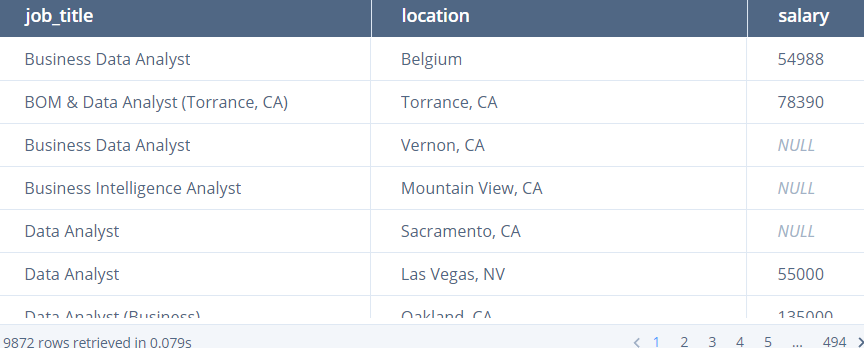

5. Retrieve the list of job titles (job_title) and the corresponding company names (name) for all job postings that mention 'Data Scientist' in job title. Use the job_postings_fact and company_dim tables for this query.

In [ ]:
 SELECT
    job_postings.job_title,
    company.name
FROM job_postings_fact AS job_postings
INNER JOIN company_dim AS company
	ON job_postings.company_id = company.company_id
WHERE job_title like '%Data Scientist%'
;

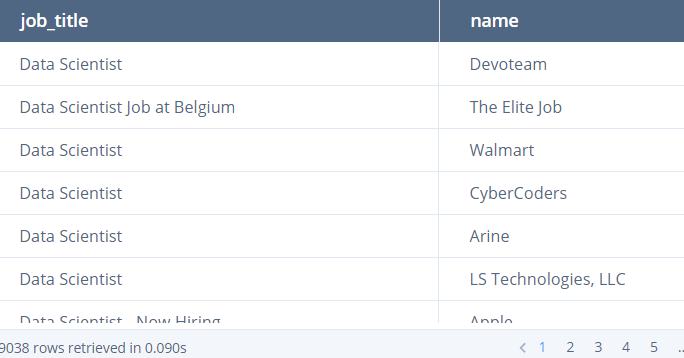

6. Fetch all job postings, including their job titles (job_title) and the names of the skills required (skills), even if no skills are listed for a job. Ensure that the job in located in 'New York' and offers 'Health Insurance'. Use the job_postings_fact, skills_job_dim, and skills_dim tables.

In [ ]:
SELECT
   job_postings.job_title,
   skills.skills,
   job_postings.job_location,
   job_postings.job_health_insurance
FROM job_postings_fact AS job_postings
LEFT JOIN skills_job_dim AS skills_to_job
	ON job_postings.job_id = skills_to_job.skill_id
LEFT JOIN skills_dim AS skills
	ON skills_to_job.skill_id = skills.skill_id
WHERE job_location = 'New York' AND job_health_insurance = 1
;

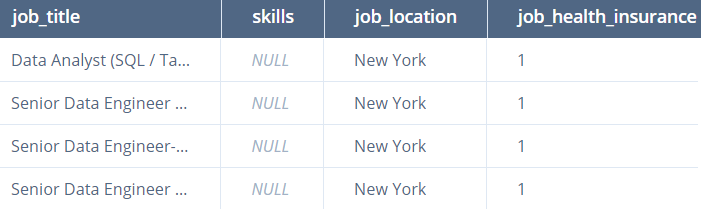

7.